In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sb
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
path_to_file= 'C:\Users\Michael.O\Downloads\AirQualityUCI.csv'
data= pd.read_csv(path_to_file,sep=',',encoding='utf-8')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888


In [5]:
(data.iloc[:, 2:] == -200.0).sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
AH                366
dtype: int64

In [6]:
data.replace(-200.0, data.median(), inplace=True)

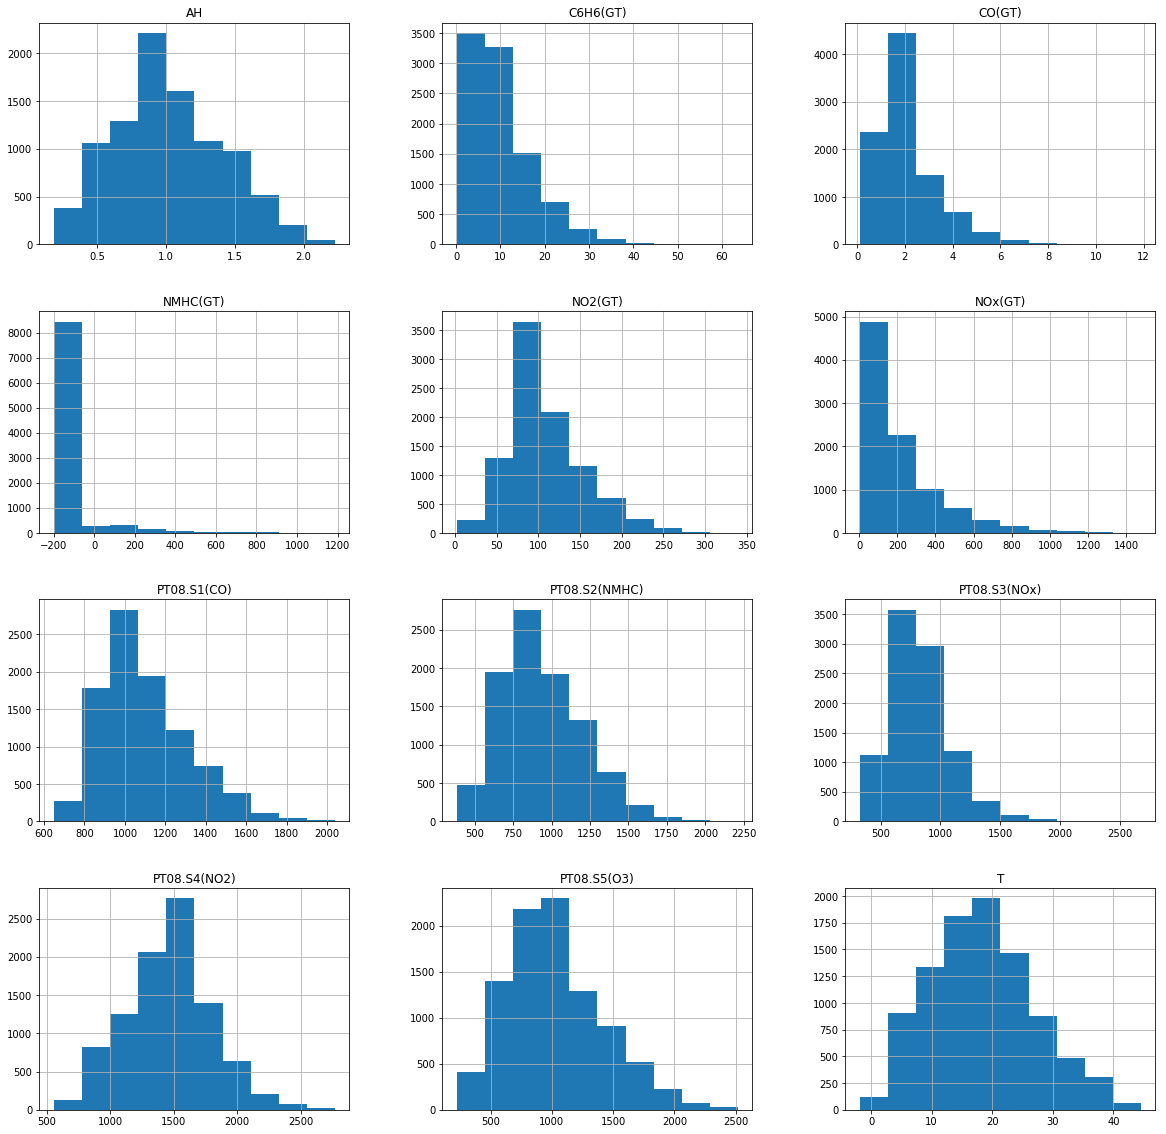

In [7]:
pd.DataFrame.hist(data, figsize=(20,20));

In [8]:
from pandas.plotting import scatter_matrix

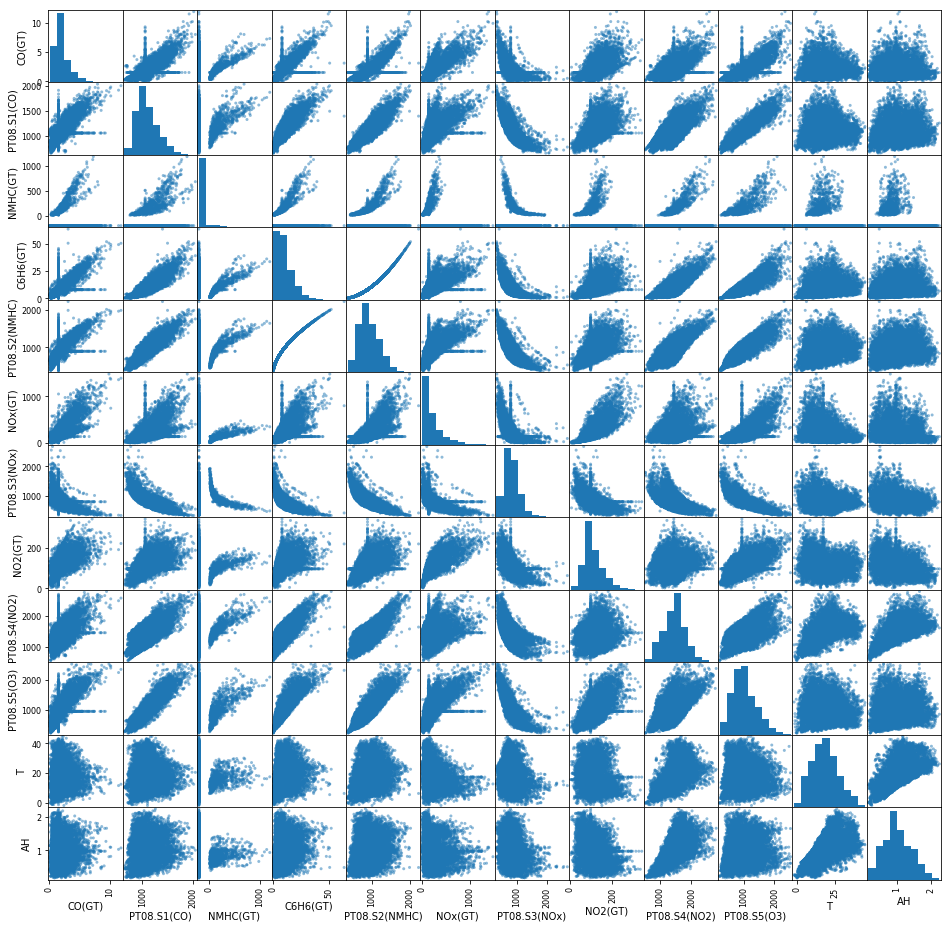

In [9]:
scatter_matrix(data, figsize=(16,16));

In [10]:
X = data.as_matrix(columns=['PT08.S1(CO)', 'C6H6(GT)'])

In [12]:
X

array([[1360. ,   11.9],
       [1292. ,    9.4],
       [1402. ,    9. ],
       ...,
       [1142. ,   12.4],
       [1003. ,    9.5],
       [1071. ,   11.9]])

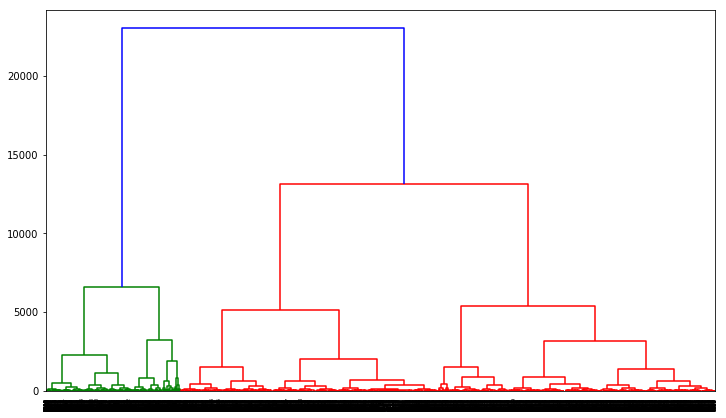

In [17]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(X, 'ward')
plt.figure(figsize=(12,7))
dendogram = sch.dendrogram(Z)

In [63]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


In [64]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y = hc.fit_predict(X)

In [66]:
print(metrics.silhouette_score(X, y))

0.5386552778795132


In [67]:
label= y

In [68]:
label

array([0, 0, 0, ..., 2, 1, 2], dtype=int64)

In [69]:
colors = {0 : 'r',
          1 : 'g',
          2 : 'b',
          3 : 'y',
          4 : 'c'} # map integer label to color
label_color = [colors[l] for l in labels]


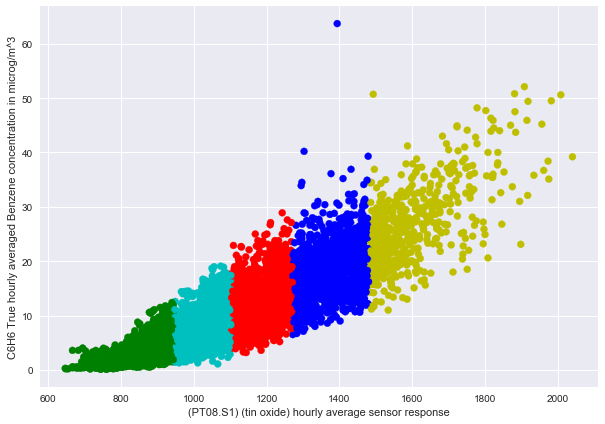

In [70]:
plt.figure('hc', figsize=(10,7))
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response')
plt.ylabel('C6H6 True hourly averaged Benzene concentration in microg/m^3')
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]], c=label_color, cmap=cmap)

In [71]:
from sklearn import metrics
print(metrics.silhouette_score(X, labels))

0.5344461028307087


In [72]:
# Interpretion: The dendogram helped us determine the number of clusters to use for prediction. We are able to determine 3 clusters and group the measurements.
 # the silhoute co-efficient indicates the cluster model is mid dense. we will try with other cluster numbers to see how dense samples can get.

In [86]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.4718500668240197


In [88]:
label=y
label

array([3, 3, 3, ..., 0, 2, 0], dtype=int64)

In [89]:
colors = {0 : 'r',
          1 : 'g',
          2 : 'b',
          3 : 'y',
          4 : 'c'} 
label_color = [colors[l] for l in labels]


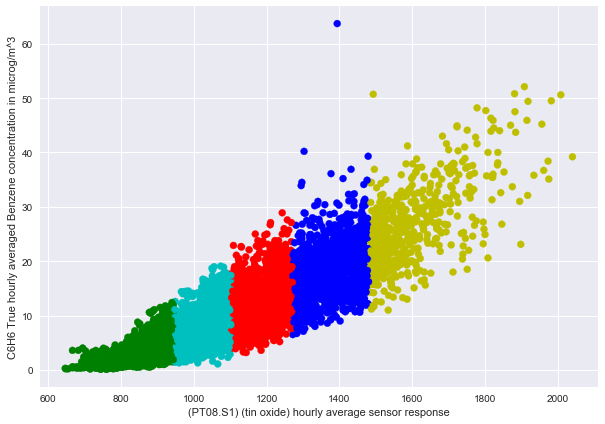

In [93]:
plt.figure('hc', figsize=(10,7))
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response')
plt.ylabel('C6H6 True hourly averaged Benzene concentration in microg/m^3')
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]], c=label_color, cmap=cmap)

In [94]:
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.4925558048708349


In [95]:
hc = AgglomerativeClustering(n_clusters=7, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.48409945101851015


In [96]:
hc = AgglomerativeClustering(n_clusters=8, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.4881998679140572


In [97]:
hc = AgglomerativeClustering(n_clusters=9, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.4847681822223424


In [98]:
hc = AgglomerativeClustering(n_clusters=10, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.4961982955309932


In [99]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
y = hc.fit_predict(X)
print(metrics.silhouette_score(X, y))

0.6029638106812941


In [ ]:
# there seem to a decrease in the silhouette co-efficient with an increasing number of clusters. However the decrease is not consistent as cluster number that are even seem to have lesser difference.